<a href="https://colab.research.google.com/github/anjanasa13/British-Airways-Project/blob/main/British_Airways_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, I undertook the task of scraping customer review data from the Skytrax website to analyze feedback specifically about **British Airways (BA)**. Using Python, I collected, cleaned, and analyzed the data to uncover insights into customer sentiment and preferences. Techniques such as **sentiment analysis**, **topic modeling**, and **word cloud generation** were employed to understand the content of the reviews and extract meaningful information.

Throughout the project, Python proved to be a powerful tool for data processing and analysis, enabling efficient extraction of insights from the collected review data.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | As always when I fly BA it ...
1,✅ Trip Verified | First time using BA busines...
2,Not Verified | Extremely rude ground service....
3,✅ Trip Verified | My son and I flew to Geneva...
4,✅ Trip Verified | For the price paid (bought ...


In [ ]:
df.count()

reviews    1000
dtype: int64

In [ ]:
df["reviews"] = df["reviews"].str.replace("✅ Trip Verified |", "", regex=False)
df["reviews"] = df["reviews"].str.replace("✅", "", regex=False)

# Display the cleaned DataFrame
print(df.head())
df.count()


                                             reviews
0    As always when I fly BA it was a total shamb...
1    First time using BA business class but we we...
2  Not Verified |  Extremely rude ground service....
3    My son and I flew to Geneva last Sunday for ...
4    For the price paid (bought during a sale) it...


reviews    1000
dtype: int64

In [ ]:
df.to_csv("data/BA_reviewsfinal.csv", index=False)

In [ ]:
df.count()

reviews    1000
dtype: int64

In [ ]:
from google.colab import files

# Save the DataFrame to a CSV file
df.to_csv("data/BA_reviewsfinal.csv", index=False)

# Download the CSV file
files.download("data/BA_reviewsfinal.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

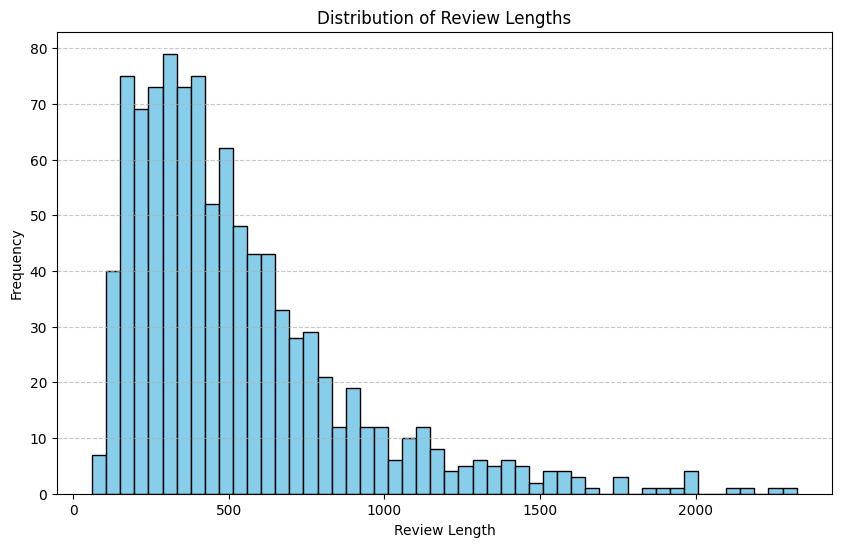

In [ ]:




# Calculate the length of each review
df['review_length'] = df['cleaned_reviews'].apply(len)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


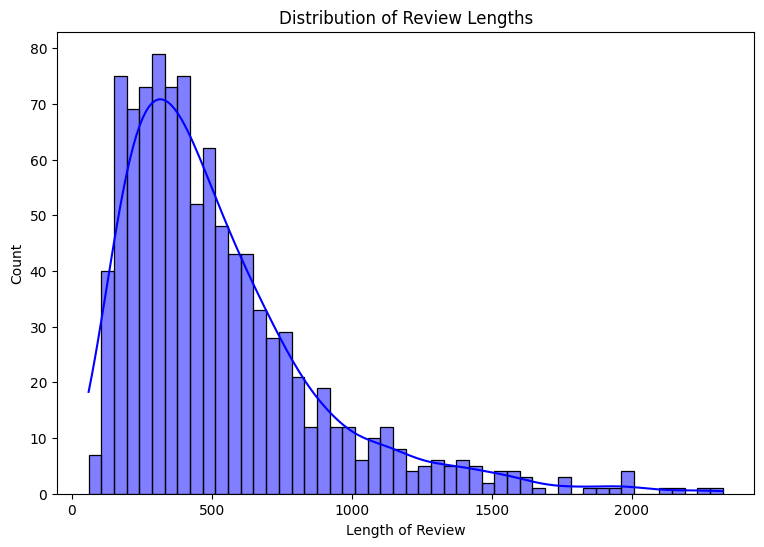

In [ ]:


# Calculating the length of each review
df['Review Length'] = df['cleaned_reviews'].apply(len)

# Plotting the distribution of review lengths
plt.figure(figsize=(9, 6))
sns.histplot(df['Review Length'], bins=50, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()


In [ ]:


# Displaying basic statistics of review lengths
review_length_stats = df['Review Length'].describe()

# Print the statistics
print("Review Length Statistics:")
print(review_length_stats)


Review Length Statistics:
count    1000.00000
mean      527.99100
std       357.36056
min        61.00000
25%       279.75000
50%       429.50000
75%       671.00000
max      2324.00000
Name: Review Length, dtype: float64


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string




nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Function for text cleaning
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a clean text
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply text cleaning to the 'reviews' column
df['cleaned_reviews'] = df['reviews'].apply(clean_text)

# Display the cleaned DataFrame
print(df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             reviews  \
0    As always when I fly BA it was a total shamb...   
1    First time using BA business class but we we...   
2  Not Verified |  Extremely rude ground service....   
3    My son and I flew to Geneva last Sunday for ...   
4    For the price paid (bought during a sale) it...   

                                     cleaned_reviews  
0  always fly ba total shambles booked manchester...  
1  first time using ba business class pleased ser...  
2  verified extremely rude ground service nonrev ...  
3  son flew geneva last sunday skiing holiday les...  
4  price paid bought sale decent experience altho...  


In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))

    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))

    return newlist

df['POS tagged'] = df['cleaned_reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,cleaned_reviews,sentiment,review_length,Review Length,POS tagged
0,As always when I fly BA it was a total shamb...,always fly ba total shambles booked manchester...,positive,494,494,"[(always, r), (fly, v), (ba, a), (total, a), (..."
1,First time using BA business class but we we...,first time using ba business class pleased ser...,positive,481,481,"[(first, a), (time, n), (using, v), (ba, a), (..."
2,Not Verified | Extremely rude ground service....,verified extremely rude ground service nonrev ...,positive,564,564,"[(verified, v), (extremely, r), (rude, a), (gr..."
3,My son and I flew to Geneva last Sunday for ...,son flew geneva last sunday skiing holiday les...,negative,871,871,"[(son, n), (flew, v), (geneva, a), (last, a), ..."
4,For the price paid (bought during a sale) it...,price paid bought sale decent experience altho...,positive,495,495,"[(price, n), (paid, v), (bought, a), (sale, n)..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,cleaned_reviews,sentiment,review_length,Review Length,POS tagged,Lemma
0,As always when I fly BA it was a total shamb...,always fly ba total shambles booked manchester...,positive,494,494,"[(always, r), (fly, v), (ba, a), (total, a), (...",always fly ba total shamble book manchester ...
1,First time using BA business class but we we...,first time using ba business class pleased ser...,positive,481,481,"[(first, a), (time, n), (using, v), (ba, a), (...",first time use ba business class pleased ser...
2,Not Verified | Extremely rude ground service....,verified extremely rude ground service nonrev ...,positive,564,564,"[(verified, v), (extremely, r), (rude, a), (gr...",verify extremely rude ground service nonrev ...
3,My son and I flew to Geneva last Sunday for ...,son flew geneva last sunday skiing holiday les...,negative,871,871,"[(son, n), (flew, v), (geneva, a), (last, a), ...",son fly geneva last sunday ski holiday les a...
4,For the price paid (bought during a sale) it...,price paid bought sale decent experience altho...,positive,495,495,"[(price, n), (paid, v), (bought, a), (sale, n)...",price pay bought sale decent experience alth...


In [ ]:
df[['reviews','Lemma','cleaned']]

,reviews,Lemma
0,As always when I fly BA it was a total shamb...,always fly ba total shamble book manchester ...
1,First time using BA business class but we we...,first time use ba business class pleased ser...
2,Not Verified | Extremely rude ground service....,verify extremely rude ground service nonrev ...
3,My son and I flew to Geneva last Sunday for ...,son fly geneva last sunday ski holiday les a...
4,For the price paid (bought during a sale) it...,price pay bought sale decent experience alth...
...,...,...
995,Bridgetown to Gatwick. I couldn't imagine th...,bridgetown gatwick couldnt imagine first cla...
996,London to Athens. Classic BA love and hate r...,london athens classic ba love hate relations...
997,I booked a British Airways flight from Amste...,book british airway flight amsterdam london ...
998,Flying premium economy on British Airways fr...,fly premium economy british airways new orle...


In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

def sentimentcount(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'

df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,cleaned_reviews,sentiment,review_length,Review Length,POS tagged,Lemma,Sentiment,Analysis
0,As always when I fly BA it was a total shamb...,always fly ba total shambles booked manchester...,positive,494,494,"[(always, r), (fly, v), (ba, a), (total, a), (...",always fly ba total shamble book manchester ...,-0.9179,Negative
1,First time using BA business class but we we...,first time using ba business class pleased ser...,positive,481,481,"[(first, a), (time, n), (using, v), (ba, a), (...",first time use ba business class pleased ser...,0.9313,Positive
2,Not Verified | Extremely rude ground service....,verified extremely rude ground service nonrev ...,positive,564,564,"[(verified, v), (extremely, r), (rude, a), (gr...",verify extremely rude ground service nonrev ...,0.7976,Positive
3,My son and I flew to Geneva last Sunday for ...,son flew geneva last sunday skiing holiday les...,negative,871,871,"[(son, n), (flew, v), (geneva, a), (last, a), ...",son fly geneva last sunday ski holiday les a...,-0.8387,Negative
4,For the price paid (bought during a sale) it...,price paid bought sale decent experience altho...,positive,495,495,"[(price, n), (paid, v), (bought, a), (sale, n)...",price pay bought sale decent experience alth...,0.9201,Positive


In [ ]:
sentimentcount = df['Analysis'].value_counts()
sentimentcount

Positive    469
Negative    419
Neutral     112
Name: Analysis, dtype: int64

In [ ]:


# Calculate sentiment counts
sentiment_count = df['Analysis'].value_counts()

# Convert the Series to a DataFrame
sentiment_count_table = pd.DataFrame({'Sentiment': sentiment_count.index, 'Count': sentiment_count.values})

# Display the sentiment count table
sentiment_count_table


,Sentiment,Count
0,Positive,469
1,Negative,419
2,Neutral,112


([<matplotlib.patches.Wedge at 0x7d5d3f0ca470>,
 [Text(0.10695900313408752, 1.094787546352516, 'Positive'),
  Text(-0.47771678222910186, -0.9908514903741494, 'Negative'),
  Text(1.2672907463411172, -0.46526784139694655, 'Neutral')],
 [Text(0.058341274436775004, 0.5971568434650087, '46.9%'),
  Text(-0.2605727903067828, -0.5404644492949905, '41.9%'),
  Text(0.7979238032518144, -0.2929464186573367, '11.2%')])

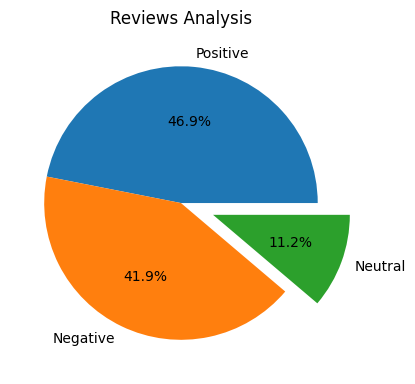

In [ ]:

%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(sentimentcount.values, labels = sentimentcount.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("Preprocessed British Airways reviews.csv")

In [ ]:
from textblob import TextBlob

# Function for sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    # Assign polarity as positive, negative, or neutral
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative' if analysis.sentiment.polarity < 0 else 'neutral'

# Apply sentiment analysis to the cleaned reviews
df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment)

# Display the DataFrame with sentiment information
print(df[['cleaned_reviews', 'sentiment']].head())
df.count()

                                     cleaned_reviews sentiment
0  always fly ba total shambles booked manchester...  positive
1  first time using ba business class pleased ser...  positive
2  verified extremely rude ground service nonrev ...  positive
3  son flew geneva last sunday skiing holiday les...  negative
4  price paid bought sale decent experience altho...  positive


reviews            1000
cleaned_reviews    1000
sentiment          1000
review_length      1000
Review Length      1000
POS tagged         1000
dtype: int64

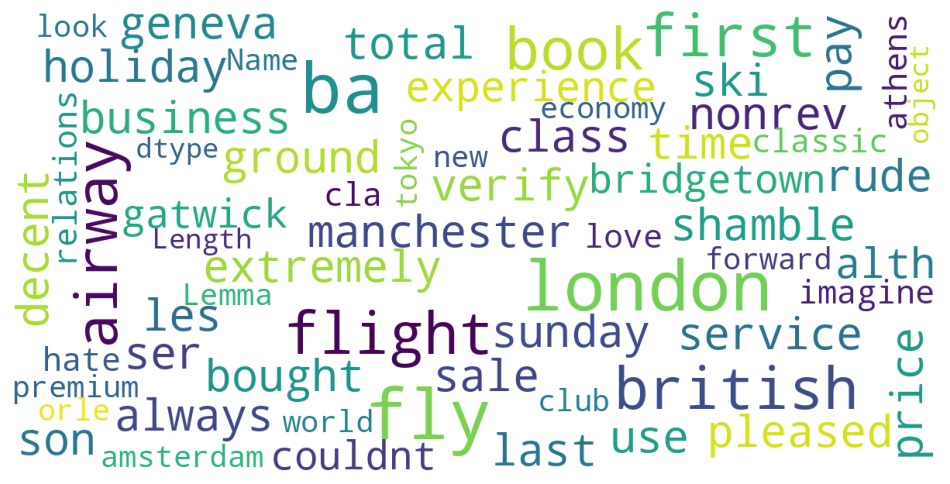

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

In [ ]:


# Count of positive, negative, and neutral sentiments
sentiment_counts = df['sentiment'].value_counts()

# Display the counts
print("Sentiment Counts:")
print(sentiment_counts)



Sentiment Counts:
positive    640
negative    345
neutral      15
Name: sentiment, dtype: int64


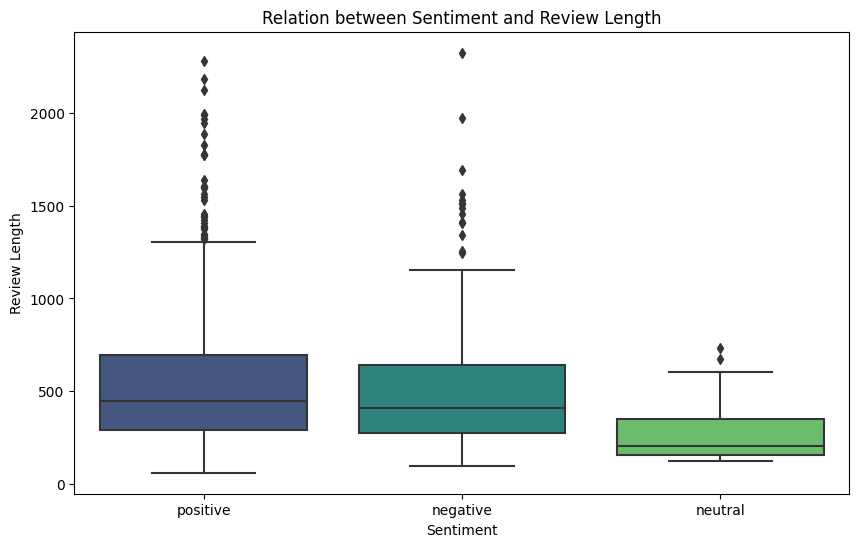

In [ ]:



# Boxplot to visualize the distribution of review lengths for each sentiment category
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='Review Length', data=df, palette='viridis')
plt.title('Relation between Sentiment and Review Length')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()


In [ ]:
# Calculate mean review length for each sentiment category
mean_review_length_by_sentiment = df.groupby('sentiment')['Review Length'].mean()
print("Mean Review Length by Sentiment:\n", mean_review_length_by_sentiment)

# Perform a statistical test (e.g., ANOVA) if applicable
from scipy.stats import f_oneway
statistic, p_value = f_oneway(df[df['sentiment']=='positive']['Review Length'],
                               df[df['sentiment']=='negative']['Review Length'],
                               df[df['sentiment']=='neutral']['Review Length'])
print("\nANOVA p-value:", p_value)


Mean Review Length by Sentiment:
 sentiment
negative    496.072464
neutral     297.200000
positive    550.606250
Name: Review Length, dtype: float64

ANOVA p-value: 0.003003564099835938


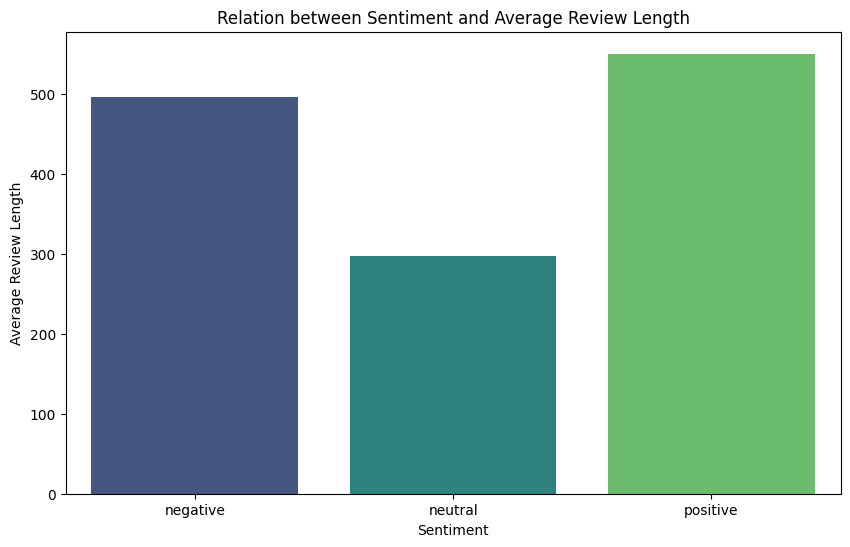

In [ ]:


# Calculate mean review length for each sentiment category
mean_review_length_by_sentiment = df.groupby('sentiment')['Review Length'].mean().reset_index()

# Column chart to visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='sentiment', y='Review Length', data=mean_review_length_by_sentiment, palette='viridis')
plt.title('Relation between Sentiment and Average Review Length')
plt.xlabel('Sentiment')
plt.ylabel('Average Review Length')
plt.show()


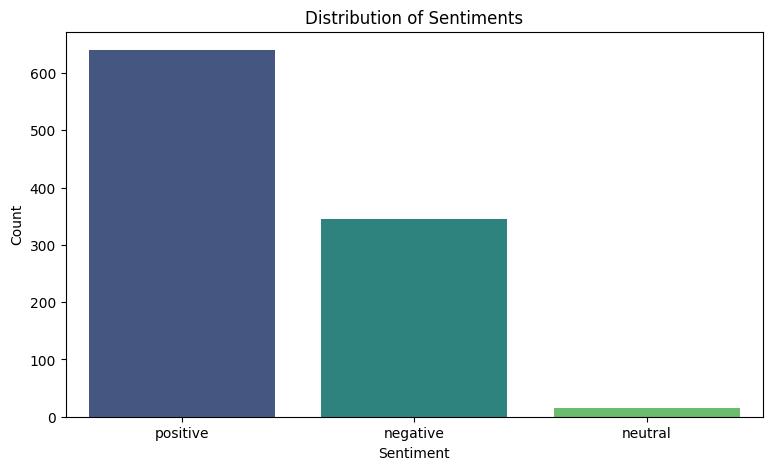

In [ ]:

# Analyzing the distribution of sentiments
sentiment_distribution = df['sentiment'].value_counts()

# Plotting the distribution of sentiments
plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


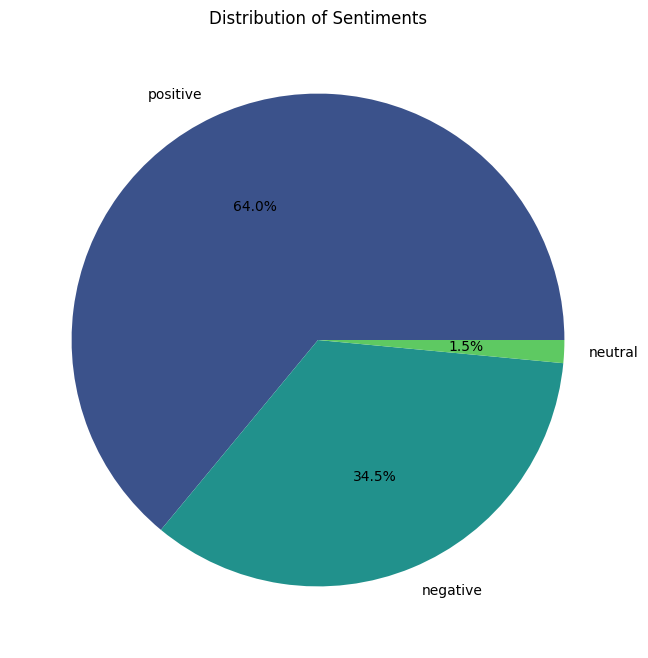

In [ ]:


# Analyzing the distribution of sentiments
sentiment_distribution = df['sentiment'].value_counts()

# Plotting a pie chart for the distribution of sentiments
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(sentiment_distribution)))
plt.title('Distribution of Sentiments')
plt.show()


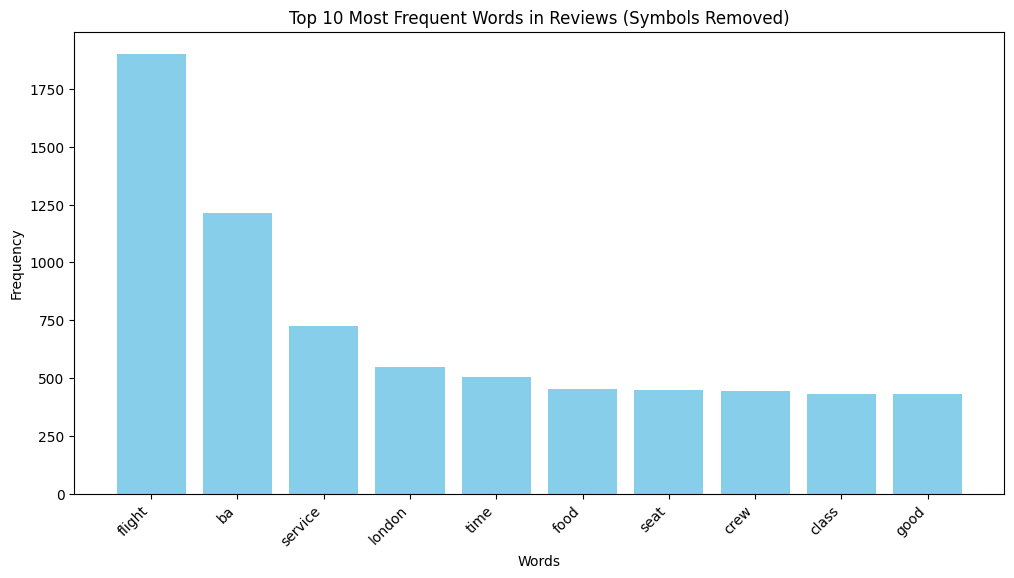

In [ ]:
import re
from collections import Counter



# Combine all reviews into a single string
all_reviews = ' '.join(df['cleaned_reviews'])

# Remove non-alphanumeric characters
all_reviews = re.sub(r'[^a-zA-Z\s]', '', all_reviews)

# Tokenize the text into words
words = all_reviews.split()

# Count the frequency of each word
word_freq = Counter(words)

# Get the 10 most frequent words
most_common_words = dict(word_freq.most_common(10))

# Create a column chart
plt.figure(figsize=(12, 6))
plt.bar(most_common_words.keys(), most_common_words.values(), color='skyblue')
plt.title('Top 10 Most Frequent Words in Reviews (Symbols Removed)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()
